<a href="https://colab.research.google.com/github/Dimildizio/DS_course/blob/main/Neural_networks/Basic/Spiral4torch_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Spiral data distribution for pytorch neuron

In [1]:
import torch
import numpy as np

from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(42)

Let's create a synthetic dataset of 3 classes, with two parameter columns and 300 obsetvations. Balanced classes with 100 samples each.

##Create train test datasets

In [3]:
def plot_spiral(X, y):
  plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
  plt.title('Spiral')
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  plt.show()

In [4]:
def create_spiral(samples_num = 100, parameters_num = 2, classes_num = 3):

  X = np.zeros((samples_num * classes_num, parameters_num))
  y = np.zeros((samples_num * classes_num), dtype = 'uint8')

  for i in range(classes_num):
    class_indices = range(samples_num * i, samples_num * (i+1))
    radius = np.linspace(0.0, 1, samples_num)
    angle = np.linspace(i*4, (i+1)*4, samples_num) + np.random.rand(samples_num) * 0.2  #theta
    X[class_indices] = np.c_[radius * np.sin(angle), radius * np.cos(angle)]
    y[class_indices] = i

  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state=42)
  
  X_train = torch.Tensor(X_train)
  X_test = torch.Tensor(X_test)
  y_train = torch.Tensor(y_train).to(torch.int64)
  y_test = torch.Tensor(y_test).to(torch.int64) 
  
  return X_train, X_test, y_train, y_test

In [5]:
X_train, X_test, y_train, y_test = create_spiral()

In [6]:
print('Train size: ', X_train.shape, y_train.shape)
print('Test size: ', X_test.shape, y_test.shape)

Train size:  torch.Size([240, 2]) torch.Size([240])
Test size:  torch.Size([60, 2]) torch.Size([60])


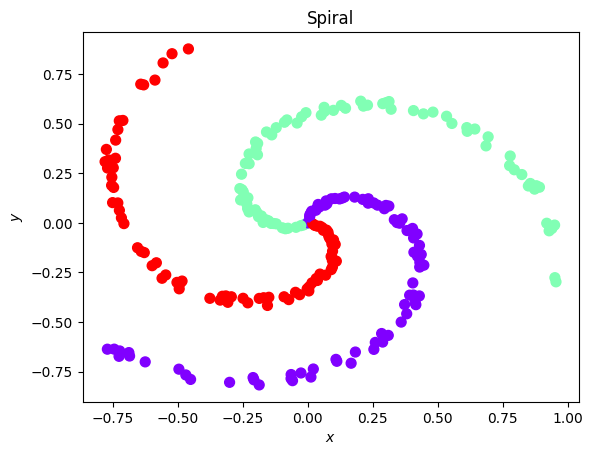

In [7]:
plot_spiral(X_train, y_train)

##Create a Neuron

In [17]:
def train_nn(net, X, y, iters=500, lr = 0.0001):
  neuron = net
  loss_fn = torch.nn.CrossEntropyLoss(reduction = 'sum')
  optimizer = torch.optim.SGD(neuron.parameters(), lr = lr)
  losses = []

  for iteration in range(iters):
    y_pred = neuron(X)
    loss = loss_fn(y_pred, y)
    losses.append(loss)
    
    optimizer.zero_grad()       #don't forget to zero previous gradients
    loss.backward()
    optimizer.step()

  plt.plot(range(iters), [x.data.numpy() for x in losses])
  plt.show()
  return neuron

Define batch size, input and output

In [18]:
features_in = 2
classes_out = 3
iterations = 1000
lr = 0.0001

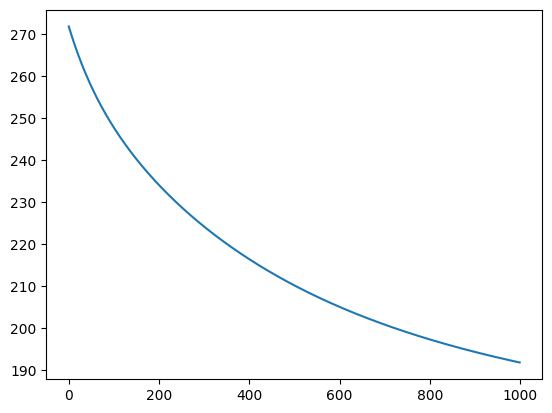

In [19]:
net = torch.nn.Sequential(torch.nn.Linear(features_in, classes_out))
neuron = train_nn(net, X_train, y_train, iters = iterations)

##Create a visualization of decision borders vs spiral

In [11]:
def get_coordplane(X, stepsize = 0.2):
  #feature 1
  #create buffer area of min and max so its min-1, max+1
  x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
  features_1 = np.arange(x_min,x_max, stepsize)

  #feature 2
  y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
  features_2 = np.arange(y_min, y_max, stepsize)

  #create coordinates n*n sized x and n*n sized y.T
  xx,yy = np.meshgrid(features_1, features_2)
  print(xx.shape, yy.shape)
  grid = np.c_[xx.flatten(), yy.flatten()]
  return (torch.Tensor(grid), xx, yy)

In [12]:
def predict_z_axis(model, grid, shape):
  z = model(grid).data.numpy()
  z = np.argmax(z,axis=1).reshape(shape)
  return z

In [13]:
def spiral_plane(model, X, y):
  grid, xx, yy = get_coordplane(X)
  zz = predict_z_axis(model, grid, xx.shape)

  plt.contourf(xx, yy, zz, cmap = 'rainbow', alpha=0.3)
  plot_spiral(X, y)

In [37]:
def get_result(model, iterations = 1000, lr = 0.0001):
  result = train_nn(model, X_train, y_train, iterations, lr)
  spiral_plane(result, X_train, y_train)
  spiral_plane(result, X_test, y_test)
  return result

In [38]:
#define hyperparameters
features_in = 2
classes_out = 3
iterations = 1000
lr = 0.0003

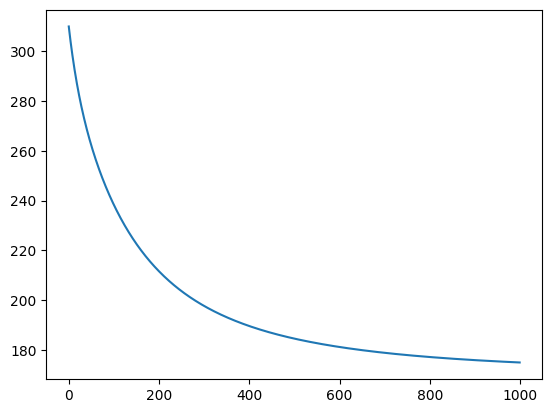

(19, 19) (19, 19)


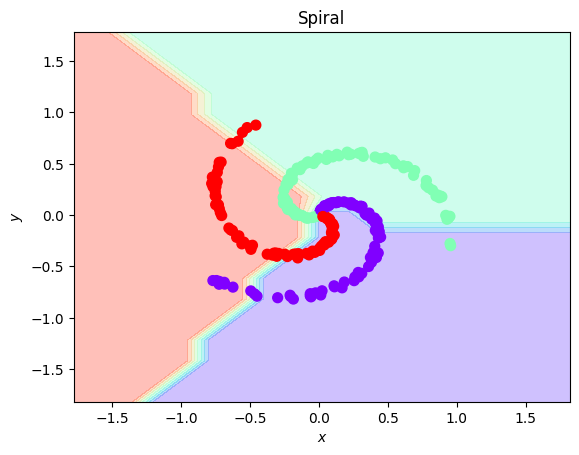

(19, 19) (19, 19)


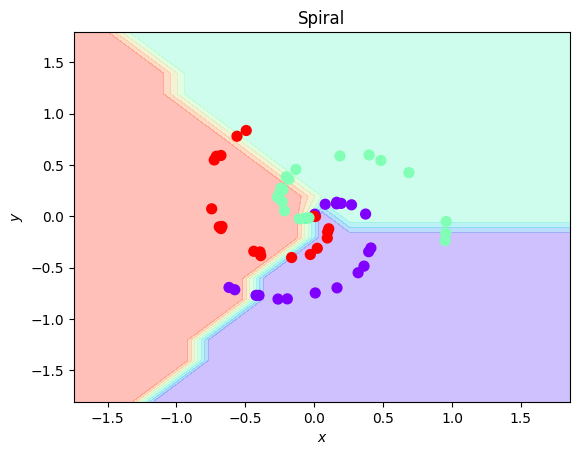

Sequential(
  (0): Linear(in_features=2, out_features=3, bias=True)
)

In [40]:
#run neuron
net = torch.nn.Sequential(torch.nn.Linear(features_in, classes_out))
get_result(net, iterations, lr)

That's the best one neuron can do. After all a sole neuron is linear. But more neurons together could do much better.

#Multi-Layer Perceptron

Pytorch framework is pretty convenient since not much is required to get from one neuron implementation to MLP.  

In [31]:
#define parameters
features_in = 2
hidden_neurons = 100
classes_out = 3
iterations = 1800
lr = 0.0001

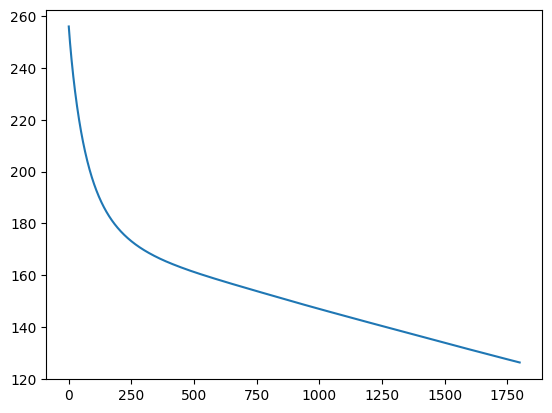

(19, 19) (19, 19)


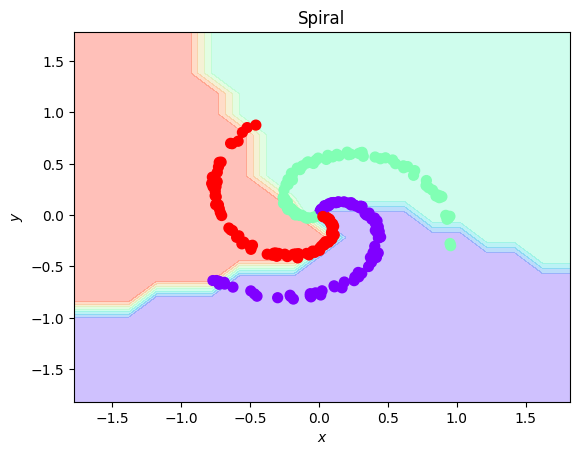

(19, 19) (19, 19)


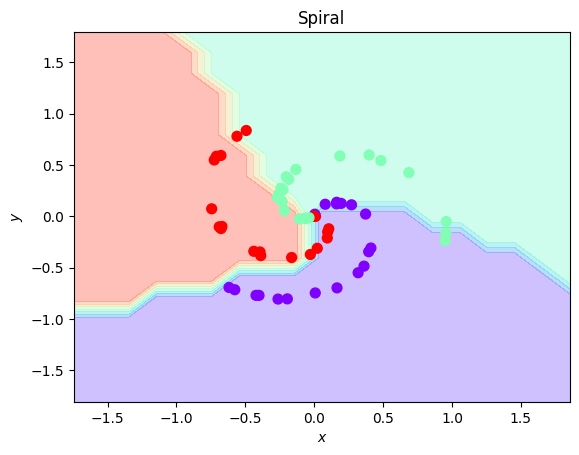

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)

In [44]:
two_layer = torch.nn.Sequential(
    torch.nn.Linear(features_in, hidden_neurons),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_neurons, classes_out))

get_result(two_layer, iterations, lr)

That's that. That simple. Change just the net itselp and the architecture of weights and biases updating remains the same. So here is the result.

Looks like two layers cope better. What if we add MOAR layers and tinker with hyperparameters?!

In [99]:
#define parameters
features_in = 2
hidden_neurons = 100
classes_out = 3
iterations = 400
lr = 0.0015

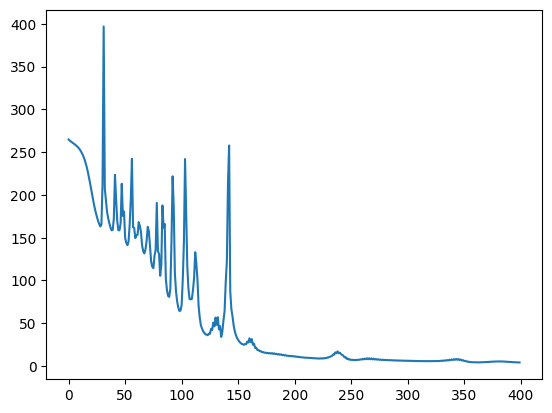

(19, 19) (19, 19)


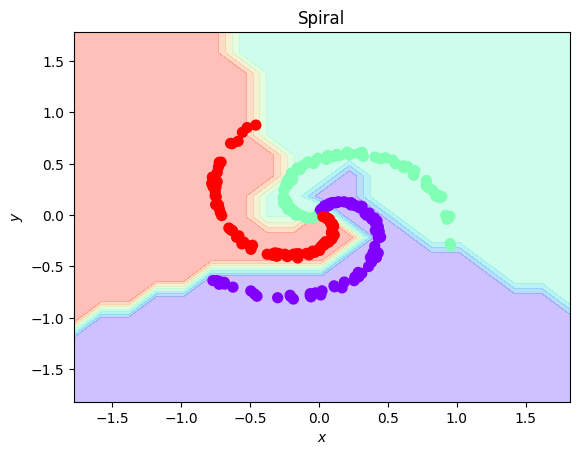

(19, 19) (19, 19)


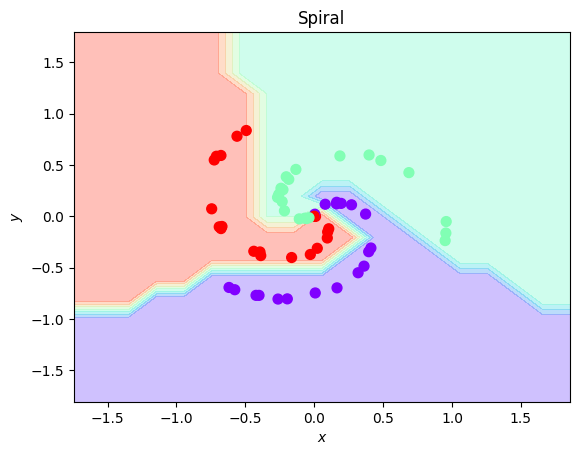

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=100, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=100, bias=True)
  (7): ELU(alpha=1.0)
  (8): Linear(in_features=100, out_features=3, bias=True)
)

In [100]:
moarnet = torch.nn.Sequential(
    torch.nn.Linear(features_in, hidden_neurons),
    torch.nn.ELU(),
    torch.nn.Linear(hidden_neurons, hidden_neurons),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(hidden_neurons, hidden_neurons),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_neurons, hidden_neurons),
    torch.nn.ELU(),
    torch.nn.Linear(hidden_neurons, classes_out))

get_result(moarnet, iterations, lr)

Much better now! Just a small mistake on the test. Apporximates pretty well. Sometimes there could be spikes on the loss plot but well, that's gradient trying to get out of local minimum and find global one after all and it depends on activation functionas well.